In [8]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
sx = qt.sigmax();sy = qt.sigmay(); sz = qt.sigmaz(); s0 = qt.qeye(2)

In [11]:
# Cavity and qubit interacting by a a^+ s_z in qutip
# Size of the space N, coherent state of the cavity alpha, initial state of the qubit is the supperposition
# Time evolution with a collapse operator

N = 10 # Size of the boson space
alpha = 2  #Magnitude of the coherent state


psi0_q = (qt.basis(2,0)+qt.basis(2,1)).unit() # Initial state of the qubit (two levels, eg. S-T)
psi0_r = qt.coherent(N, alpha)  # Initial state of the cavity (coherent state)
psi0 = qt.tensor(psi0_r, psi0_q) # Initial state of the system (tensor product)

a = qt.destroy(N)  # Destroy operator of the cavity
unityN = qt.qeye(N)    # Identity operator of the cavity

# Hamiltonian
H = qt.tensor(a.dag()*a, sz) + qt.tensor(unityN, sz) + qt.tensor(a*a.dag(), s0) 

# Time list
tlist = np.linspace(0, 10, 100)


# Observables
n = qt.tensor(a.dag()*a, s0) # Number of photons in the cavity
sz = qt.tensor(unityN, sz) # Spin of the qubit
Q = qt.tensor(a.dag()+a, s0)/2 # Quadrature of the cavity
P = qt.tensor(1j*(a.dag()-a), s0)/2 # Quadrature of the cavity


result = qt.mesolve(H, psi0, tlist, e_ops=[Q], c_ops=[], options=qt.Options(nsteps=10000))







TypeError: Incompatible quantum object dimensions

IndexError: list index out of range

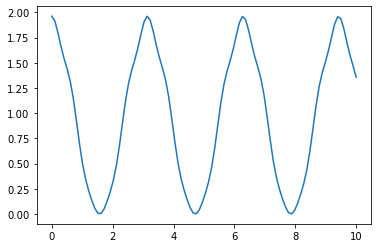

In [10]:
#plot n, sz, Q 
plt.plot(tlist, result.expect[0], label="n")
plt.plot(tlist, result.expect[1], label="sz")
plt.plot(tlist, result.expect[2], label="Q")
plt.legend()
plt.show()
